# Import all modules

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
# load the data
data = pd.read_csv('/Users/adhivp/Desktop/FraudSense AI/Dataset/Combined_data.csv')
data.head()
#Drop unnecessary column
data = data.drop(['Domain'], axis = 1).copy()

# Split the Dataset

In [16]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# Define the model

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

# Train the model

In [19]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Test the model

In [20]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [21]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.865
XGBoost : Accuracy on test Data: 0.871


## Confusion Matrix

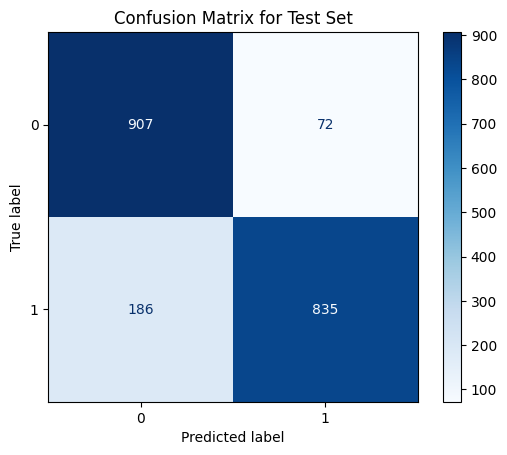

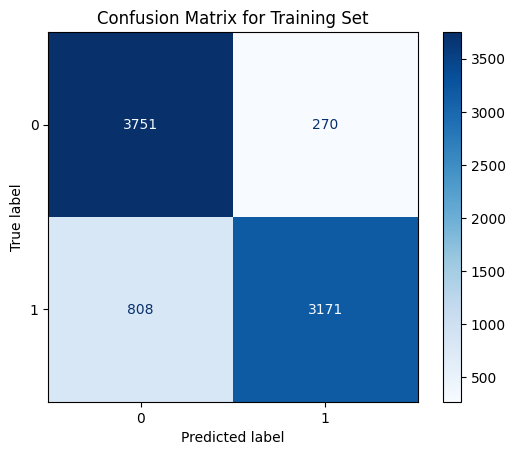

In [25]:

cm_test = confusion_matrix(y_test, y_test_xgb)
cm_train = confusion_matrix(y_train, y_train_xgb)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=xgb.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=xgb.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Set')
plt.show()

## Save the model

In [23]:
joblib.dump(xgb, 'XGBoost.pkl')

['XGBoost.pkl']